In [62]:
import pandas as pd
import numpy as np
sales = pd.read_excel('cryptopunk_sales.xlsx')
metadata = pd.read_csv('cryptopunk_metadata.csv')

sales = sales[['block_date', 'block_month', 'token_id', 'amount_usd', 'amount_original']]

unique_attributes = set()
attribute_columns = [col for col in metadata.columns if 'Attribute' in col]
for col in attribute_columns:
    unique_attributes.update(metadata[col].dropna().unique())

# Creating dummy variables
for attribute in unique_attributes:
    metadata[attribute] = metadata[attribute_columns].apply(lambda x: attribute in x.values, axis=1).astype(int)

# Displaying the result
metadata.head()

metadata = metadata[pd.Series(metadata.columns)[~pd.Series(metadata.columns).isin(attribute_columns)]]
sales = pd.merge(sales, metadata, left_on = 'token_id', right_on = 'ID')

In [61]:
sales

,Unnamed: 0,block_date,block_month,block_time,token_id,amount_usd,trade_category,seller,buyer,amount_original,amount_raw,tx_hash,block_number,tx_from,tx_to,unique_trade_id
0,0,2020-08-04,2020-08-01,2020-08-04 01:47,8327,398.8700,Bid accepted,0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,0xcd2c66fe27f8c6e08a5bd42b2617a34f8854eece,1.00,1000000000000000000,0x06c9ca6a1ba0f204ec5437d74892f9c37128e759ef93...,10590436,0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,cryptopunks-v1-10590436-0x06c9ca6a1ba0f204ec54...
1,1,2020-08-02,2020-08-01,2020-08-02 14:48,3499,733.1160,Buy,0x1a96afe48e215c47d80eeff6eef64685247c2503,0x93ca0ecfc2bf0d9166c7e87bc2d9a8e0ee92b9fb,1.99,1990000000000000000,0x1b46f45382509036bfb503f8aa8dfd3b2139673aa0ef...,10581031,0x274a8b99f93cebf8a3c572b69574aa647b03794f,0xf67f2b39652019c9a00d54540480ebb0fae593f2,cryptopunks-v1-10581031-0x1b46f45382509036bfb5...
2,2,2020-08-14,2020-08-01,2020-08-14 13:41,7087,530.9625,Buy,0xf556cf12807fc720a9b57f54f548d575905a1ed0,0xcf0e9b4746cfb97bae329fe5f696969f6564566a,1.25,1250000000000000000,0x7ac673ab4a32f49ce2b6120a9d5463f1472fffaf5782...,10658443,0xcf0e9b4746cfb97bae329fe5f696969f6564566a,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,cryptopunks-v1-10658443-0x7ac673ab4a32f49ce2b6...
3,3,2020-08-22,2020-08-01,2020-08-22 20:38,3044,311.0800,Bid accepted,0xc8a974a97f6a7f57b6ce09aed5905d5547039f11,0xfb3ca875955675d091e6f82038a288e97284400f,0.80,800000000000000000,0x913a124ac0360b8cb7bcbfa861d415a480a96d6fae1e...,10712289,0xc8a974a97f6a7f57b6ce09aed5905d5547039f11,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,cryptopunks-v1-10712289-0x913a124ac0360b8cb7bc...
4,4,2020-08-18,2020-08-01,2020-08-18 18:35,2483,361.5645,Buy,0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,0x725db1cc501cbef4db9cf06a741d44a4c41a2426,0.85,850000000000000000,0xf9ffc97d5aa6277529683de74c1854ae206a586947e7...,10685665,0x4090b585c6ba6f8d8cbd76aa805f28069c732ca3,0xf67f2b39652019c9a00d54540480ebb0fae593f2,cryptopunks-v1-10685665-0xf9ffc97d5aa627752968...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24372,24372,2021-05-03,2021-05-01,2021-05-03 23:40,9881,109996.9420,Buy,0xb70c1a3242e363b4772b83acdc10df94e6c3fb02,0xcf8401fabc11524de68ca98e52b7459e52b0ce89,31.90,31900000000000000000,0x3fa376e8aea9e22f75a2e1a77077faa626e36384a904...,12364262,0xcf8401fabc11524de68ca98e52b7459e52b0ce89,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,cryptopunks-v1-12364262-0x3fa376e8aea9e22f75a2...
24373,24373,2021-05-14,2021-05-01,2021-05-14 08:33,6056,62127.6800,Buy,0x94f67de48a70fde96396f767a2ce5719af7f1bdb,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,16.00,16000000000000000000,0x659762330df09f3f480c3d2ac28f2b73cbb337f67e3d...,12431441,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,cryptopunks-v1-12431441-0x659762330df09f3f480c...
24374,24374,2021-05-13,2021-05-01,2021-05-13 17:17,8237,62291.2300,Bid accepted,0xd4442b4c85e54c9e40304eedeaf0d9a5e6a4a072,0x2376854e3ae0e4db84cb25c7bed6a7ac7341782e,17.00,17000000000000000000,0x6e49052545957d0162903573850ad72ba22cd6ed4174...,12427340,0xd4442b4c85e54c9e40304eedeaf0d9a5e6a4a072,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,cryptopunks-v1-12427340-0x6e49052545957d016290...
24375,24375,2021-05-15,2021-05-01,2021-05-15 19:37,3672,147260.0000,Bid accepted,0x14ae8100ea85a11bbb36578f83ab1b5c1cfdd61c,0x61d9d9cc8c3203dab7100ea79ced77587201c990,40.00,40000000000000000000,0xfe155266f1ea72fa67e956c01b24befc8d757dd7e6c9...,12440954,0x14ae8100ea85a11bbb36578f83ab1b5c1cfdd61c,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,cryptopunks-v1-12440954-0xfe155266f1ea72fa67e9...


<Axes: xlabel='block_date'>

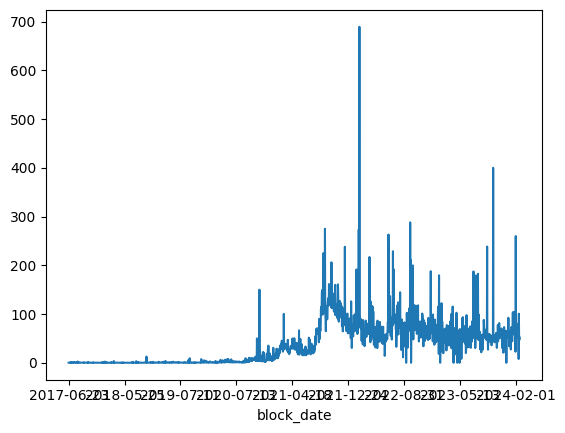

In [5]:
np.log(sales.sort_values(by ='block_date').groupby('block_date').amount_original.mean()).plot()#, 
#sales.sort_values(by ='block_date').groupby('block_date').amount_original.mean().plot() 

In [63]:
sales = sales[['amount_original',
       'Gender', 'Category', 'Front Beard Dark', 'VR', 'Clown Eyes Green',
       'Buck Teeth', 'Wild Hair', 'Silver Chain', 'Cigarette',
       'Purple Eye Shadow', 'Pigtails', 'Handlebars', 'Normal Beard',
       'Blonde Bob', 'Muttonchops', 'Smile', 'Shaved Head', 'Mustache',
       'Mohawk Dark', 'Straight Hair', 'Choker', 'Regular Shades',
       'Peak Spike', 'Tassle Hat', 'Dark Hair', 'Knitted Cap', 'Bandana',
       'Pink With Hat', 'Gold Chain', 'Mohawk', 'Welding Goggles',
       'Cap Forward', 'Tiara', 'Purple Lipstick', 'Small Shades',
       'Stringy Hair', 'Do-rag', 'Wild White Hair', 'Frown', 'Red Mohawk',
       'Half Shaved', 'Clown Hair Green', 'Vampire Hair', 'Beanie',
       'Clown Nose', 'Messy Hair', 'Blonde Short', 'Mole', 'Purple Hair',
       'Chinstrap', 'Orange Side', 'Hot Lipstick', 'Horned Rim Glasses', 'Cap',
       'Green Eye Shadow', 'Nerd Glasses', 'Rosy Cheeks', 'Pilot Helmet',
       'Straight Hair Dark', 'Medical Mask', 'Frumpy Hair', 'Wild Blonde',
       'Hoodie', 'Earring', 'Big Shades', 'Spots', 'Headband', 'Goat',
       'Big Beard', 'Classic Shades', 'Clown Eyes Blue', 'Blue Eye Shadow',
       'Cowboy Hat', 'Luxurious Beard', 'Crazy Hair', 'Normal Beard Black',
       'Fedora', 'Straight Hair Blonde', 'Vape', 'Mohawk Thin', 'Front Beard',
       '3D Glasses', 'Police Cap', 'Top Hat', 'Shadow Beard', 'Eye Mask',
       'Black Lipstick', 'Eye Patch', 'Pipe', 'block_month']]

to_dummies = ['Gender','block_month' ]#,  'skinColor']# 'year_month', 

for column in to_dummies:
    dummies = pd.get_dummies(sales[column])
    # Generate dummy variables
 
    # Prefix the original column name to each dummy column
    dummies.columns = [f"{column}_{col}" for col in dummies.columns]

    # Now, `dummies` has column names with both the original column name and the value.
    sales = pd.concat([sales, dummies], axis=1)

for column in to_dummies:
    sales.drop(column, axis=1, inplace=True)

sales = sales.dropna(subset = 'amount_original')

from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import StandardScaler
import pandas as pd

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
sales.reset_index(inplace=True, drop=True)
X = sales[pd.Series(sales.columns)[pd.Series(sales.columns)!='amount_original'].values]

y = sales['amount_original']  # Your target vector
from sklearn.model_selection import train_test_split

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 19501, number of used features: 171
[LightGBM] [Info] Using GPU Device: GeForce GTX 960, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 5 dense feature groups (0.15 MB) transferred to GPU in 0.000968 secs. 1 sparse feature groups
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 43.922266
16.893068712169384


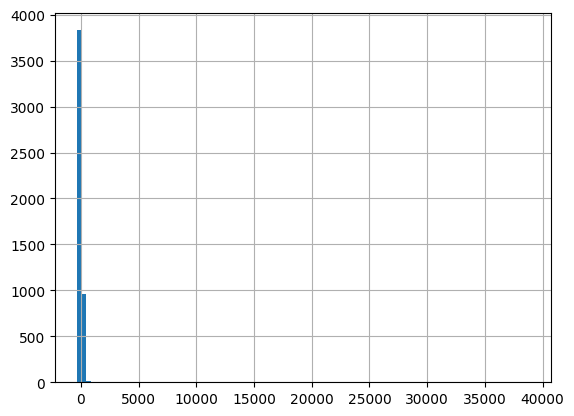

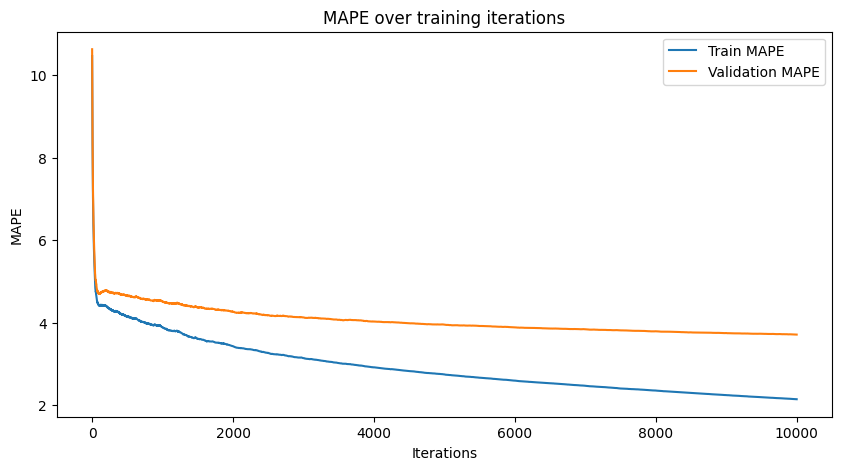

<Axes: >

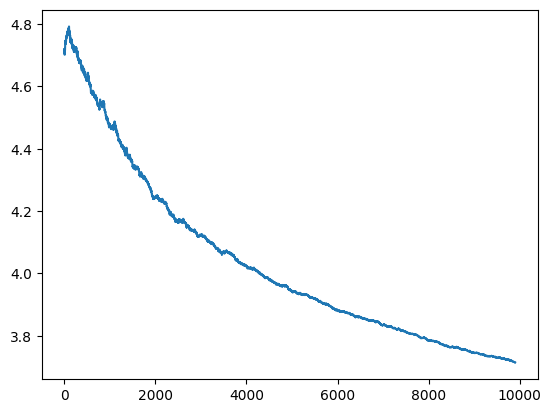

In [64]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
try:
    del(bst)
except:
    pass

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtrain = lgb.Dataset(X_train[pd.Series(X_train.columns)[~pd.Series(X_train.columns).isin(['numberId', 'year_month'])].values], label=y_train)
dval = lgb.Dataset(X_test[pd.Series(X_test.columns)[~pd.Series(X_test.columns).isin(['numberId', 'year_month'])].values], label=y_test, reference=dtrain)
# params = {
#     'objective': 'regression',
#     'metric': 'mape',
#     'device': 'gpu',
#     'max_depth': 8,
#     'min_child_weight': 3, 
#     'gamma': 3.7531865106827738, 
#     'subsample': 0.5900088153168562, 
#     'colsample_bytree': 0.9322355603990324, 
#     'learning_rate': 0.07104295798575301, 
#     'num_leaves': 70, 
#     'reg_lambda': 1.7248568149978345, 
#     'reg_alpha': 2.885724137666342}
params = {
    'objective': 'regression',
    'metric': 'mape',
    'device': 'gpu',
    }

# best_params['objective'] =  'regression'
# best_params['metric'] =  'mape'
# best_params['device'] =  'gpu'
    
evals={}

bst = lgb.train(params = params, train_set = dtrain, valid_sets=[dtrain, dval], valid_names=['train', 'val'], num_boost_round=10000,
                callbacks=[
                        #lgb.early_stopping(stopping_rounds=300), 
                        lgb.record_evaluation(evals)] )

X_test['y_pred_gb_lgb'] = bst.predict(X_test[pd.Series(X_test.columns)[~pd.Series(X_test.columns).isin(['numberId', 'year_month'])].values], num_iteration=bst.best_iteration)
X_test['y_test'] = y_test
X_test['error'] = X_test['y_test'] - X_test['y_pred_gb_lgb']
X_test['perc_error']  = ((1- (X_test['y_test']/X_test['y_pred_gb_lgb']))*100)
X_test['perc_error_abs'] = X_test.perc_error.abs()
X_test[X_test['perc_error']>-299.99].perc_error.hist(bins=100)

#print(X_test[X_test['perc_error']>-299.99].perc_error.abs().mean())

print(X_test['error'].abs().mean())

plt.figure(figsize=(10, 5))
plt.plot(evals['train']['mape'], label='Train MAPE')
plt.plot(evals['val']['mape'], label='Validation MAPE')
plt.xlabel('Iterations')
plt.ylabel('MAPE')
plt.title('MAPE over training iterations')
plt.legend()
plt.show()

pd.Series(evals['val']['mape'][100:]).plot()

<Axes: >

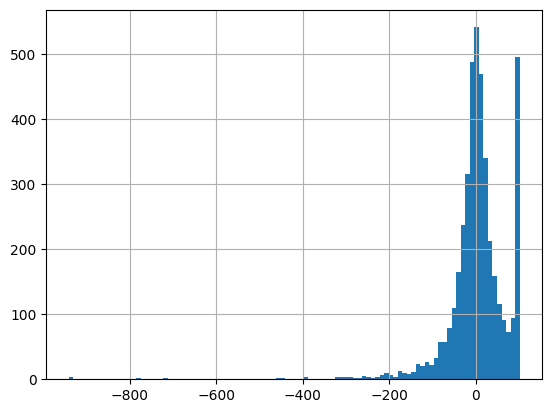

In [65]:
X_test[(X_test['perc_error']>-1000.99)&(X_test['perc_error']<100.99)].perc_error.hist(bins=100)

In [51]:
evals['train']['mape']

[10.963641110874542,
 10.936654996408965,
 10.916184606071779,
 10.894382356286153,
 10.876326061422814,
 10.858856605375301,
 10.845688857973922,
 10.82833358459024,
 10.816012490847612,
 10.800275734085982,
 10.79269357620284,
 10.778228602509984,
 10.770312539799756,
 10.758386895715333,
 10.748456312587615,
 10.740852405174481,
 10.732429510892944,
 10.725107359764966,
 10.71373353098731,
 10.705231450345618,
 10.69586883211603,
 10.688546863125511,
 10.680633906074151,
 10.673249584374169,
 10.667068381842167,
 10.661262540958942,
 10.653533925042252,
 10.648633973548247,
 10.641646310626305,
 10.639241150109633,
 10.632968718438155,
 10.627994714117099,
 10.62205146295938,
 10.61478329080688,
 10.606972259404795,
 10.604819059129715,
 10.599772905085835,
 10.592885305115532,
 10.586327442389921,
 10.582832479187909,
 10.57670515314716,
 10.574021811516008,
 10.56953487612655,
 10.561966480423045,
 10.555265779401829,
 10.550401469429081,
 10.545630390231672,
 10.543944988950274,


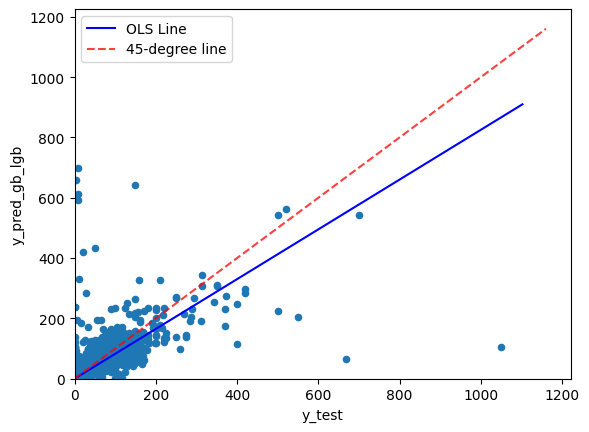

In [66]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming X_test, y_test, and y_pred_gb_lgb are already defined

# Create the scatter plot
ax = X_test[(X_test['y_test'] < 2000)&(X_test['y_pred_gb_lgb'] < 2000)].plot(kind='scatter', x='y_test', y='y_pred_gb_lgb')

# Compute the OLS regression line without a constant
X = X_test[(X_test['y_test'] < 2000)&(X_test['y_pred_gb_lgb'] < 2000)]['y_test']
model = sm.OLS(X_test[(X_test['y_test'] < 2000)&(X_test['y_pred_gb_lgb'] < 2000)]['y_pred_gb_lgb'], X)
results = model.fit()
slope = results.params[0]

# Plot the OLS regression line
x_vals = np.array(ax.get_xlim())
y_vals = slope * x_vals
plt.plot(x_vals, y_vals, 'b-', label='OLS Line')

# Determine the upper limit for the 45-degree line
upper_limit = max(ax.get_xlim()[1], ax.get_ylim()[1])

# Plot the 45-degree line starting from (0, 0)
plt.plot([0, upper_limit], [0, upper_limit], 'r--', alpha=0.75, label='45-degree line')

# Set the axes to start from (0, 0)
plt.xlim(left=0)
plt.ylim(bottom=0)

# Show the plot with the legend
plt.legend()
plt.show()


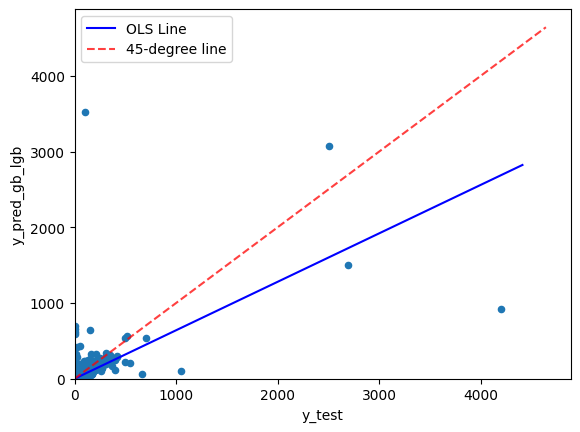

In [67]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming X_test, y_test, and y_pred_gb_lgb are already defined

# Create the scatter plot
ax = X_test.plot(kind='scatter', x='y_test', y='y_pred_gb_lgb')

# Compute the OLS regression line without a constant
X = X_test['y_test']
model = sm.OLS(X_test['y_pred_gb_lgb'], X)
results = model.fit()
slope = results.params[0]

# Plot the OLS regression line
x_vals = np.array(ax.get_xlim())
y_vals = slope * x_vals
plt.plot(x_vals, y_vals, 'b-', label='OLS Line')

# Determine the upper limit for the 45-degree line
upper_limit = max(ax.get_xlim()[1], ax.get_ylim()[1])

# Plot the 45-degree line starting from (0, 0)
plt.plot([0, upper_limit], [0, upper_limit], 'r--', alpha=0.75, label='45-degree line')

# Set the axes to start from (0, 0)
plt.xlim(left=0)
plt.ylim(bottom=0)

# Show the plot with the legend
plt.legend()
plt.show()
